# In-depth analysis: predictive modeling using Deep Learning

### 3.2  Deep Neural Networks

Importing relevant packages:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error 

In [3]:
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [4]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Using TensorFlow backend.


Definition of the model and input layer:

In [5]:
X_train = pd.read_csv('../Data/processed/x_train.csv')
y_train = pd.read_csv('../Data/processed/y_train.csv')
X_test = pd.read_csv('../Data/processed/x_test.csv')
y_test = pd.read_csv('../Data/processed/y_test.csv')

In [6]:
X_train.fillna(value=0, inplace=True)

Feel free to check Keras documentation [here](https://keras.io/getting-started/sequential-model-guide/) for more details about the packages imported in this section and the methods mentioned below.

Once imported **Sequential**, **Dense** and **Activation** we create the Sequential model followed by the addition of layers to the constructor via .add() method. 

The first layer has as nodes as dimensions containing the feature vectors. This information is extracted as the number of columns of the training set.

In [7]:
model = Sequential()

model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


Configuration if **hidden layers** with a **normal** initializer as **RELU** activation function:

In [8]:
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

Configuration of the **output layer** as one node and a **linear** activation function:

In [9]:
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

Next, we configure the learning process, which receives an optimizer, a loss function and a list of metrics. 

In [10]:
model.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mean_absolute_error', 'mae'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               7168      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 172,033
Trainable params: 172,033
Non-trainable params: 0
_________________________________________________________________


Checkpoint callback:

In [12]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [13]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 6827 samples, validate on 1707 samples
Epoch 1/100
6827/6827 [==============================] - 2s 249us/step - loss: 64.8454 - mean_absolute_error: 64.8454 - mae: 64.8454 - val_loss: 58.3551 - val_mean_absolute_error: 58.3551 - val_mae: 58.3551

Epoch 00001: val_loss improved from inf to 58.35506, saving model to Weights-001--58.35506.hdf5
Epoch 2/100
6827/6827 [==============================] - 1s 150us/step - loss: 55.9681 - mean_absolute_error: 55.9681 - mae: 55.9681 - val_loss: 56.7954 - val_mean_absolute_error: 56.7954 - val_mae: 56.7954

Epoch 00002: val_loss improved from 58.35506 to 56.79537, saving model to Weights-002--56.79537.hdf5
Epoch 3/100
6827/6827 [==============================] - 1s 181us/step - loss: 54.7721 - mean_absolute_error: 54.7721 - mae: 54.7721 - val_loss: 61.3090 - val_mean_absolute_error: 61.3090 - val_mae: 61.3090

Epoch 00003: val_loss did not improve from 56.79537
Epoch 4/100
6827/6827 [========

6827/6827 [==============================] - 1s 197us/step - loss: 48.7926 - mean_absolute_error: 48.7925 - mae: 48.7925 - val_loss: 51.5475 - val_mean_absolute_error: 51.5475 - val_mae: 51.5475

Epoch 00030: val_loss improved from 51.55640 to 51.54754, saving model to Weights-030--51.54754.hdf5
Epoch 31/100
6827/6827 [==============================] - 1s 170us/step - loss: 48.8957 - mean_absolute_error: 48.8957 - mae: 48.8957 - val_loss: 52.0601 - val_mean_absolute_error: 52.0601 - val_mae: 52.0601

Epoch 00031: val_loss did not improve from 51.54754
Epoch 32/100
6827/6827 [==============================] - 1s 196us/step - loss: 48.6186 - mean_absolute_error: 48.6186 - mae: 48.6186 - val_loss: 52.1479 - val_mean_absolute_error: 52.1479 - val_mae: 52.1479

Epoch 00032: val_loss did not improve from 51.54754
Epoch 33/100
6827/6827 [==============================] - 1s 195us/step - loss: 48.2240 - mean_absolute_error: 48.2240 - mae: 48.2240 - val_loss: 53.2005 - val_mean_absolute_error: 


Epoch 00060: val_loss did not improve from 50.57153
Epoch 61/100
6827/6827 [==============================] - 1s 172us/step - loss: 45.1166 - mean_absolute_error: 45.1166 - mae: 45.1166 - val_loss: 50.8790 - val_mean_absolute_error: 50.8790 - val_mae: 50.8790

Epoch 00061: val_loss did not improve from 50.57153
Epoch 62/100
6827/6827 [==============================] - 1s 191us/step - loss: 45.0980 - mean_absolute_error: 45.0980 - mae: 45.0980 - val_loss: 51.2065 - val_mean_absolute_error: 51.2065 - val_mae: 51.2065

Epoch 00062: val_loss did not improve from 50.57153
Epoch 63/100
6827/6827 [==============================] - 1s 195us/step - loss: 44.8520 - mean_absolute_error: 44.8520 - mae: 44.8520 - val_loss: 51.0212 - val_mean_absolute_error: 51.0212 - val_mae: 51.0212

Epoch 00063: val_loss did not improve from 50.57153
Epoch 64/100
6827/6827 [==============================] - 1s 172us/step - loss: 44.9197 - mean_absolute_error: 44.9197 - mae: 44.9197 - val_loss: 51.1869 - val_mean

6827/6827 [==============================] - 1s 192us/step - loss: 42.6898 - mean_absolute_error: 42.6898 - mae: 42.6898 - val_loss: 52.5118 - val_mean_absolute_error: 52.5118 - val_mae: 52.5118

Epoch 00092: val_loss did not improve from 50.31532
Epoch 93/100
6827/6827 [==============================] - 1s 166us/step - loss: 42.4194 - mean_absolute_error: 42.4194 - mae: 42.4194 - val_loss: 51.7476 - val_mean_absolute_error: 51.7476 - val_mae: 51.7476

Epoch 00093: val_loss did not improve from 50.31532
Epoch 94/100
6827/6827 [==============================] - 1s 195us/step - loss: 42.3293 - mean_absolute_error: 42.3293 - mae: 42.3293 - val_loss: 53.1059 - val_mean_absolute_error: 53.1059 - val_mae: 53.1059

Epoch 00094: val_loss did not improve from 50.31532
Epoch 95/100
6827/6827 [==============================] - 1s 196us/step - loss: 42.2854 - mean_absolute_error: 42.2854 - mae: 42.2854 - val_loss: 54.0312 - val_mean_absolute_error: 54.0312 - val_mae: 54.0312

Epoch 00095: val_loss

In [14]:
predicted_prices = model.predict(X_test)
predictions = np.nan_to_num(predicted_prices)

In [15]:
MAE = mean_absolute_error(y_test , predictions)
print('Validation MAE = ', MAE)

Validation MAE =  65.44279013779416


In [17]:
predictions

array([[170.35234],
       [122.72421],
       [  0.     ],
       ...,
       [115.20947],
       [158.66248],
       [137.87068]], dtype=float32)

In [26]:
diff = y_test.unstack() - predictions.reshape(-1)

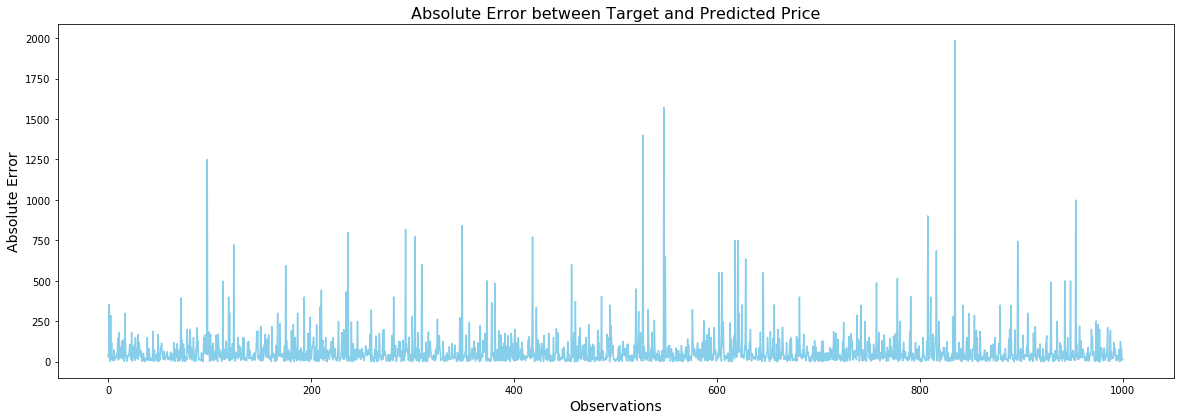

In [28]:
xh = np.linspace(0, 1000, len(y_test))

_ = plt.figure(figsize=(20, 6.5))
_ = sns.lineplot(x=xh, y=np.abs(diff), color='skyblue')
_ = plt.xlabel('Observations', size=14)
_ = plt.ylabel('Absolute Error', size=14)
_ = plt.title('Absolute Error between Target and Predicted Price', size=16)

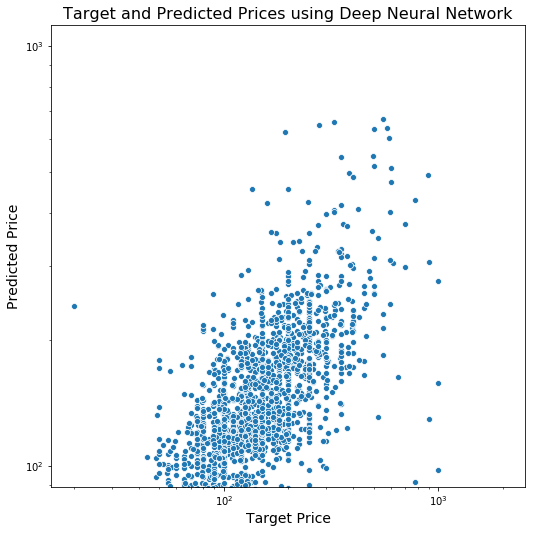

In [47]:
_ = plt.figure(figsize=(8.5, 8.5))
_ = plt.xscale('log')
_ = plt.yscale('log')
_ = sns.scatterplot(x=y_test['# target'], y=predictions.reshape(-1))
_ = plt.xlabel('Target Price', size=14)
_ = plt.ylabel('Predicted Price', size=14)
_ = plt.title('Target and Predicted Prices using Deep Neural Network', size=16)

###  KFold Cross Validation

Implementation of a 3-fold cross validation, inserting the model on the function `deep_learning_model` and applying a concatenation of `X_train` and `X_test` as `X` and `y_train` and `y_test` as `y`.

In [48]:
X = pd.concat([X_train, X_test])
X.head()

,# accommodates,bathrooms,bedrooms,host_response_rate_float,extra_people_float,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count_entire_homes,...,property_type_encode_26,property_type_encode_27,property_type_encode_28,property_type_encode_29,property_type_encode_30,bed_type_encode_0,bed_type_encode_1,bed_type_encode_2,bed_type_encode_3,bed_type_encode_4
0,0.117647,0.1875,0.083333,0.90,0.107143,0.400000,0.700000,0.800000,0.197260,0.013889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.1250,0.083333,1.00,0.110714,0.600000,0.800000,0.866667,0.967123,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.176471,0.1250,0.166667,1.00,0.053571,0.933333,0.966667,0.977778,0.994521,0.013889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.058824,0.1875,0.083333,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.176471,0.2500,0.166667,0.88,0.053571,0.000000,0.000000,0.000000,0.008219,0.013889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
X.fillna(value=0, inplace=True)

In [50]:
y = pd.concat([y_train, y_test])

In [54]:
def deep_learning_function():
    model = Sequential()

    model.add(Dense(128, kernel_initializer='normal', input_dim = X.shape[1], activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    model.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mean_absolute_error', 'mae'])
    
    return model

Evaluation of the baseline model using 3-fold cross validation:

In [55]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

estimator = KerasRegressor(build_fn=deep_learning_function, epochs=20, batch_size=5, verbose=1)
kfold = KFold(n_splits=3)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/20
7112/7112 [==============================] - 7s 934us/step - loss: 61.1338 - mean_absolute_error: 61.1338 - mae: 61.1338
Epoch 2/20
7112/7112 [==============================] - 7s 1ms/step - loss: 56.8948 - mean_absolute_error: 56.8948 - mae: 56.8948
Epoch 3/20
7112/7112 [==============================] - 7s 1ms/step - loss: 55.9329 - mean_absolute_error: 55.9328 - mae: 55.9328
Epoch 4/20
7112/7112 [==============================] - 7s 1ms/step - loss: 55.3694 - mean_absolute_error: 55.3694 - mae: 55.3694
Epoch 5/20
7112/7112 [==============================] - 8s 1ms/step - loss: 54.9605 - mean_absolute_error: 54.9605 - mae: 54.9605
Epoch 6/20
7112/7112 [==============================] - 7s 1ms/step - loss: 54.5285 - mean_absolute_error: 54.5285 - mae: 54.5285
Epoch 7/20
7112/7112 [==============================] - 7s 1ms/step - loss: 54.3171 - mean_absolute_error: 54.3170 - mae: 54.3170
Epoch 8/20
7112/7112 [==============================] - 7s 1ms/step - loss: 53.9297 - me